In [1]:
from imports import *

In [2]:
import pickle_utils

In [3]:
from data_exploration import *

In [4]:
from math import log

In [5]:
from scipy.ndimage import gaussian_filter1d

In [19]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
data_path = 'C:\\Users\\homol\\Documents\\diplomamunka\\adat\\tweets_2015_2020'

In [7]:
save_path = 'C:\\Users\\homol\\Documents\\diplomamunka\\adat\\'

In [6]:
# load data
pre_tweet_df_list = []
stock_df_list = []
symbol_list = ['TSLA','AAPL','GOOG','GOOGL','AMZN','MSFT']
for symbol in symbol_list:
    pre_tweet_df, stock_df = load(data_path,symbol)
    pre_tweet_df_list.append(pre_tweet_df)
    stock_df_list.append(stock_df)

# Add exact time and determine the days

In [7]:
def add_datetime(tweet_df):
    tweet_df['datetime'] = datetime.datetime(2000,1,1,1,1,1)
    for ind,row in tweet_df.iterrows():
        post_date = row['post_date']
        new_date = datetime.datetime.fromtimestamp(post_date)
        tweet_df.at[ind, 'datetime'] = new_date

    return tweet_df

In [8]:
tweet_df_list = []
for pre_tweet_df in pre_tweet_df_list:
    tweet_df = add_datetime(pre_tweet_df)
    tweet_df_list.append(tweet_df)

In [9]:
tweet_df_list[0]

,tweet_id,preproc_body,writer,post_date,body,comment_num,retweet_num,like_num,date,neutral,positive,negative,ticker_symbol,datetime
0,550442977802207232,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,2015-01-01,0.053220,0.929319,0.017461,TSLA,2015-01-01 01:06:47
1,550443807834402816,Swing Trading: Up To 8.91% Return In 14 Days #...,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05
2,550443808606126081,Swing Trading: Up To 8.91% Return In 14 Days #...,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05
3,550443809700851716,Swing Trading: Up To 8.91% Return In 14 Days #...,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05
4,550443857142611968,Swing Trading: Up To 8.91% Return In 14 Days #...,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096854,1212158772015034369,"I'm getting wasted on NYE, and thanks to @NHTS...",StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,2020-01-01,0.912949,0.086988,0.000063,TSLA,2020-01-01 00:49:06
1096855,1212159099632267268,$TSLA Very Interesting dude:,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0,2020-01-01,0.000159,0.999836,0.000005,TSLA,2020-01-01 00:50:24
1096856,1212159184931717120,If only 2020 brought more self-awareness to Te...,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0,2020-01-01,0.998468,0.001303,0.000230,TSLA,2020-01-01 00:50:45
1096857,1212159838882533376,In 2020 I may start Tweeting out positive news...,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,2020-01-01,0.008685,0.990354,0.000961,TSLA,2020-01-01 00:53:21


In [10]:
# 0: Monday, ..., 5:Saturday, 6:Sunday -> 5,6 stock close
def sign_weekdays(df):
    df['weekday_digit'] = 7
    for ind,row in df.iterrows():
        date = row['date']
        day = date.weekday()
        df.at[ind, 'weekday_digit'] = day
    return df

In [11]:
stock_day_df_list = []
for stock_df in stock_df_list:
    stock_day_df = sign_weekdays(stock_df)
    stock_day_df_list.append(stock_day_df)

In [12]:
stock_day_df_list[0]

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit
0,TSLA,2015-01-01,222.41,2392947,223.090,225.68,222.2500,3
1,TSLA,2015-01-02,219.31,4753239,222.870,223.25,213.2600,4
2,TSLA,2015-01-03,219.31,4753239,222.870,223.25,213.2600,5
3,TSLA,2015-01-04,219.31,4753239,222.870,223.25,213.2600,6
4,TSLA,2015-01-05,210.09,5355485,214.550,216.50,207.1626,0
...,...,...,...,...,...,...,...,...
1924,TSLA,2020-05-22,816.88,9987475,822.174,831.78,812.0000,4
1925,TSLA,2020-05-26,818.87,8089736,834.500,834.60,815.7050,1
1926,TSLA,2020-05-27,820.23,11549530,820.860,827.71,785.0000,2
1927,TSLA,2020-05-28,805.81,7275774,813.510,824.75,801.6900,3


In [13]:
weekend_stock_df_list = []
weekday_stock_df_list = []
for stock_day_df in stock_day_df_list:
    weekend_stock_df = stock_day_df.loc[stock_day_df['weekday_digit'].isin([5,6])].reset_index(drop=True)
    weekend_stock_df_list.append(weekend_stock_df)
    
    weekday_stock_df = stock_day_df.loc[stock_day_df['weekday_digit'].isin([0,1,2,3,4])].reset_index(drop=True)
    weekday_stock_df_list.append(weekday_stock_df)

In [14]:
weekend_stock_df_list[0]

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit
0,TSLA,2015-01-03,219.31,4753239,222.87,223.25,213.260,5
1,TSLA,2015-01-04,219.31,4753239,222.87,223.25,213.260,6
2,TSLA,2015-01-10,206.66,4591310,208.92,209.98,204.960,5
3,TSLA,2015-01-11,206.66,4591310,208.92,209.98,204.960,6
4,TSLA,2015-01-17,193.07,3590855,190.70,194.49,189.650,5
...,...,...,...,...,...,...,...,...
517,TSLA,2019-12-15,358.39,6574281,361.05,365.21,354.640,6
518,TSLA,2019-12-21,405.59,14785210,410.29,413.00,400.185,5
519,TSLA,2019-12-22,405.59,14785210,410.29,413.00,400.185,6
520,TSLA,2019-12-28,430.38,9956827,435.00,435.31,426.110,5


In [15]:
weekday_stock_df_list[0]

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit
0,TSLA,2015-01-01,222.41,2392947,223.090,225.68,222.2500,3
1,TSLA,2015-01-02,219.31,4753239,222.870,223.25,213.2600,4
2,TSLA,2015-01-05,210.09,5355485,214.550,216.50,207.1626,0
3,TSLA,2015-01-06,211.28,6257651,210.060,214.20,204.2100,1
4,TSLA,2015-01-07,210.95,2965330,213.350,214.78,209.7800,2
...,...,...,...,...,...,...,...,...
1402,TSLA,2020-05-22,816.88,9987475,822.174,831.78,812.0000,4
1403,TSLA,2020-05-26,818.87,8089736,834.500,834.60,815.7050,1
1404,TSLA,2020-05-27,820.23,11549530,820.860,827.71,785.0000,2
1405,TSLA,2020-05-28,805.81,7275774,813.510,824.75,801.6900,3


In [16]:
tweet_day_df_list = []
for tweet_df in tweet_df_list:
    tweet_day_df = sign_weekdays(tweet_df)
    tweet_day_df_list.append(tweet_day_df)

In [17]:
tweet_day_df_list[0]

,tweet_id,preproc_body,writer,post_date,body,comment_num,retweet_num,like_num,date,neutral,positive,negative,ticker_symbol,datetime,weekday_digit
0,550442977802207232,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,2015-01-01,0.053220,0.929319,0.017461,TSLA,2015-01-01 01:06:47,3
1,550443807834402816,Swing Trading: Up To 8.91% Return In 14 Days #...,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05,3
2,550443808606126081,Swing Trading: Up To 8.91% Return In 14 Days #...,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05,3
3,550443809700851716,Swing Trading: Up To 8.91% Return In 14 Days #...,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05,3
4,550443857142611968,Swing Trading: Up To 8.91% Return In 14 Days #...,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096854,1212158772015034369,"I'm getting wasted on NYE, and thanks to @NHTS...",StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,2020-01-01,0.912949,0.086988,0.000063,TSLA,2020-01-01 00:49:06,2
1096855,1212159099632267268,$TSLA Very Interesting dude:,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0,2020-01-01,0.000159,0.999836,0.000005,TSLA,2020-01-01 00:50:24,2
1096856,1212159184931717120,If only 2020 brought more self-awareness to Te...,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0,2020-01-01,0.998468,0.001303,0.000230,TSLA,2020-01-01 00:50:45,2
1096857,1212159838882533376,In 2020 I may start Tweeting out positive news...,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,2020-01-01,0.008685,0.990354,0.000961,TSLA,2020-01-01 00:53:21,2


In [18]:
friday16_monday_930_df_list = []
other_day_df_list = []
for tweet_day_df in tweet_day_df_list:
    friday_to_monday_df = tweet_day_df.loc[tweet_day_df['weekday_digit'].isin([4,5,6,0])].reset_index(drop=True)
    ind_list = []
    for f_ind, f_row in friday_to_monday_df.iterrows():
        f_datetime = f_row['datetime']
        f_day_digit = f_row['weekday_digit']
        if ((f_day_digit in [5,6]) or
            ((f_day_digit == 4) and (f_datetime.hour >= 16) and (f_datetime.second > 0)) or
            ((f_day_digit == 0) and (f_datetime.hour <= 9) and (f_datetime.minute < 30))):
            ind_list.append(f_ind)
      
    friday16_monday_930_df = friday_to_monday_df.loc[(friday_to_monday_df.index.isin(ind_list))].reset_index(drop=True)   
    friday16_monday_930_df_list.append(friday16_monday_930_df)
    
    monday_to_friday_df = tweet_day_df.loc[tweet_day_df['weekday_digit'].isin([0,1,2,3,4])].reset_index(drop=True)
    other_ind_list = []
    for ind, row in monday_to_friday_df.iterrows():
        datetime = row['datetime']
        day_digit = row['weekday_digit']
        if (((day_digit == 4) and (datetime.hour < 16)) or
            ((day_digit == 0) and (datetime.hour >= 9) and (datetime.minute >= 30)) or
            (day_digit in [1,2,3])):
            other_ind_list.append(ind)
            
    other_day_df = monday_to_friday_df.loc[(monday_to_friday_df.index.isin(other_ind_list))].reset_index(drop=True)
    other_day_df_list.append(other_day_df)

In [19]:
friday16_monday_930_df_list[0]

,tweet_id,preproc_body,writer,post_date,body,comment_num,retweet_num,like_num,date,neutral,positive,negative,ticker_symbol,datetime,weekday_digit
0,551030186251022338,$TSLA Point 2nd Level Resistance 226.88Pivot P...,MsPutOptions,1420210808,$TSLA http://mf.tt/9NbEiPivot Point 2nd Level ...,0,0,0,2015-01-02,0.921580,3.693753e-02,0.041482,TSLA,2015-01-02 16:00:08,4
1,551030415986016257,$TSLA goin lower,Enrique54472742,1420210863,$TSLA goin lower,0,0,0,2015-01-02,0.065564,8.408155e-02,0.850355,TSLA,2015-01-02 16:01:03,4
2,551030514547978240,Tackling the negatives of a straddle trade $GL...,caroltheva,1420210886,Tackling the negatives of a straddle trade htt...,0,0,1,2015-01-02,0.139500,8.054887e-02,0.779951,TSLA,2015-01-02 16:01:26,4
3,551030909109948416,So much for the best stock to play in 2015 Wal...,AznOptions,1420210981,So much for the best stock to play in 2015 Wal...,0,0,0,2015-01-02,0.914221,6.853708e-02,0.017242,TSLA,2015-01-02 16:03:01,4
4,551031067751510016,$CUR Parabolic SAR $CUR Most recent stock char...,lookn4wins,1420211018,$CUR Parabolic SAR $CUR Most recent stock char...,0,0,1,2015-01-02,0.924136,5.498101e-02,0.020883,TSLA,2015-01-02 16:03:38,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272193,1211546467048968192,Recommendation Moderate #SELL for $TSLA with U...,1MinuteStock,1577690161,Recommendation Moderate #SELL for $TSLA with U...,0,0,0,2019-12-30,0.055337,5.752496e-02,0.887138,TSLA,2019-12-30 08:16:01,0
272194,1211546945065381888,Tesla China is full of hope. @elonmusk,data168,1577690275,Tesla China is full of hope. @elonmusk,1,1,8,2019-12-30,0.998310,1.225817e-03,0.000464,TSLA,2019-12-30 08:17:55,0
272195,1211548097878351872,So $TSLA is a shell company?,76Texas,1577690550,So $TSLA is a shell company?,1,0,0,2019-12-30,0.999987,1.698102e-07,0.000013,TSLA,2019-12-30 08:22:30,0
272196,1211557565055807488,"$TM, $TSLA Tesla Begins Delivery Of First Chin...",BenzingaMedia,1577692807,"$TM, $TSLA Tesla Begins Delivery Of First Chin...",0,1,2,2019-12-30,0.999836,1.410837e-04,0.000023,TSLA,2019-12-30 09:00:07,0


In [32]:
other_day_df_list[0]

,tweet_id,preproc_body,writer,post_date,body,comment_num,retweet_num,like_num,date,neutral,positive,negative,ticker_symbol,datetime,weekday_digit
0,550442977802207232,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,2015-01-01,0.053220,0.929319,0.017461,TSLA,2015-01-01 01:06:47,3
1,550443807834402816,Swing Trading: Up To 8.91% Return In 14 Days #...,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05,3
2,550443808606126081,Swing Trading: Up To 8.91% Return In 14 Days #...,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05,3
3,550443809700851716,Swing Trading: Up To 8.91% Return In 14 Days #...,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05,3
4,550443857142611968,Swing Trading: Up To 8.91% Return In 14 Days #...,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740588,1212158772015034369,"I'm getting wasted on NYE, and thanks to @NHTS...",StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,2020-01-01,0.912949,0.086988,0.000063,TSLA,2020-01-01 00:49:06,2
740589,1212159099632267268,$TSLA Very Interesting dude:,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0,2020-01-01,0.000159,0.999836,0.000005,TSLA,2020-01-01 00:50:24,2
740590,1212159184931717120,If only 2020 brought more self-awareness to Te...,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0,2020-01-01,0.998468,0.001303,0.000230,TSLA,2020-01-01 00:50:45,2
740591,1212159838882533376,In 2020 I may start Tweeting out positive news...,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,2020-01-01,0.008685,0.990354,0.000961,TSLA,2020-01-01 00:53:21,2


# Weekdays only

In [21]:
def logreturn(stock_df):
    ordered_df = stock_df.sort_values('date')
    ordered_df['close_value'] = ordered_df['close_value'].apply(lambda x:np.log(x))
    diff_df = ordered_df[['close_value']].diff()
    stock_df['logreturn'] = diff_df['close_value']
    return stock_df

In [22]:
#percentage change between close and open
def calculate_open_close_delta(stock_df):
    stock_df['open_close_delta'] = np.nan
    for ind in range(len(stock_df)-1):
        prev_day_close_value = stock_df.iloc[ind]['close_value'].item()
        next_day_open_value = stock_df.iloc[ind+1]['open_value'].item()
        delta = (prev_day_close_value - next_day_open_value)/next_day_open_value
        stock_df.at[ind+1, 'open_close_delta'] = delta
    return stock_df

In [23]:
# create logreturn stock data
weekday_logr_df_list = []
for weekday_stock_df in weekday_stock_df_list:
    weekday_logr_df = logreturn(weekday_stock_df)
    weekday_logr_df_list.append(weekday_logr_df)

In [24]:
weekday_logr_df_list[0]

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit,logreturn
0,TSLA,2015-01-01,222.41,2392947,223.090,225.68,222.2500,3,NaN
1,TSLA,2015-01-02,219.31,4753239,222.870,223.25,213.2600,4,-0.014036
2,TSLA,2015-01-05,210.09,5355485,214.550,216.50,207.1626,0,-0.042950
3,TSLA,2015-01-06,211.28,6257651,210.060,214.20,204.2100,1,0.005648
4,TSLA,2015-01-07,210.95,2965330,213.350,214.78,209.7800,2,-0.001563
...,...,...,...,...,...,...,...,...,...
1402,TSLA,2020-05-22,816.88,9987475,822.174,831.78,812.0000,4,-0.013038
1403,TSLA,2020-05-26,818.87,8089736,834.500,834.60,815.7050,1,0.002433
1404,TSLA,2020-05-27,820.23,11549530,820.860,827.71,785.0000,2,0.001659
1405,TSLA,2020-05-28,805.81,7275774,813.510,824.75,801.6900,3,-0.017737


In [25]:
weekday_stock_metrics_df_list = []
for weekday_logr_df in weekday_logr_df_list:
    weekday_stock_metrics_df = calculate_open_close_delta(weekday_logr_df)
    weekday_stock_metrics_df_list.append(weekday_stock_metrics_df)

In [26]:
weekday_stock_metrics_df_list[0]

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit,logreturn,open_close_delta
0,TSLA,2015-01-01,222.41,2392947,223.090,225.68,222.2500,3,NaN,NaN
1,TSLA,2015-01-02,219.31,4753239,222.870,223.25,213.2600,4,-0.014036,-0.002064
2,TSLA,2015-01-05,210.09,5355485,214.550,216.50,207.1626,0,-0.042950,0.022186
3,TSLA,2015-01-06,211.28,6257651,210.060,214.20,204.2100,1,0.005648,0.000143
4,TSLA,2015-01-07,210.95,2965330,213.350,214.78,209.7800,2,-0.001563,-0.009702
...,...,...,...,...,...,...,...,...,...,...
1402,TSLA,2020-05-22,816.88,9987475,822.174,831.78,812.0000,4,-0.013038,0.006600
1403,TSLA,2020-05-26,818.87,8089736,834.500,834.60,815.7050,1,0.002433,-0.021114
1404,TSLA,2020-05-27,820.23,11549530,820.860,827.71,785.0000,2,0.001659,-0.002424
1405,TSLA,2020-05-28,805.81,7275774,813.510,824.75,801.6900,3,-0.017737,0.008261


In [30]:
save_pickle(save_path+'weekday_stock_metrics_df_list.p',weekday_stock_metrics_df_list)
save_pickle(save_path+'other_day_df_list.p',other_day_df_list)

In [8]:
weekday_stock_metrics_df_list = load_pickle(save_path+'weekday_stock_metrics_df_list.p')
other_day_df_list = load_pickle(save_path+'other_day_df_list.p')

# Tweets on weekdays: today 16:00 - next_day 9:30

In [9]:
def tweets_at_stock_market_close(weekday_tweets_df):
    ind_list = []
    for ind,row in weekday_tweets_df.iterrows():
        datetime = row['datetime']
        date = row['date']
        if ((datetime < pd.Timestamp(date.year,date.month,date.day,9,30,0)) | 
            (datetime > pd.Timestamp(date.year,date.month,date.day,16,0,0))):
            ind_list.append(ind)
        
    close_df = weekday_tweets_df.loc[weekday_tweets_df.index.isin(ind_list)].reset_index(drop=True)
    return close_df

In [10]:
tweets_at_close_df_list = []

for other_day_df in other_day_df_list:
    tweets_at_close_df = tweets_at_stock_market_close(other_day_df)
    tweets_at_close_df_list.append(tweets_at_close_df)

In [11]:
tweets_at_close_df_list[0]

,tweet_id,preproc_body,writer,post_date,body,comment_num,retweet_num,like_num,date,neutral,positive,negative,ticker_symbol,datetime,weekday_digit
0,550442977802207232,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,2015-01-01,0.053220,0.929319,0.017461,TSLA,2015-01-01 01:06:47,3
1,550443807834402816,Swing Trading: Up To 8.91% Return In 14 Days #...,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05,3
2,550443808606126081,Swing Trading: Up To 8.91% Return In 14 Days #...,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05,3
3,550443809700851716,Swing Trading: Up To 8.91% Return In 14 Days #...,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:05,3
4,550443857142611968,Swing Trading: Up To 8.91% Return In 14 Days #...,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,2015-01-01,0.208621,0.780905,0.010475,TSLA,2015-01-01 01:10:16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545562,1212158772015034369,"I'm getting wasted on NYE, and thanks to @NHTS...",StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,2020-01-01,0.912949,0.086988,0.000063,TSLA,2020-01-01 00:49:06,2
545563,1212159099632267268,$TSLA Very Interesting dude:,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0,2020-01-01,0.000159,0.999836,0.000005,TSLA,2020-01-01 00:50:24,2
545564,1212159184931717120,If only 2020 brought more self-awareness to Te...,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0,2020-01-01,0.998468,0.001303,0.000230,TSLA,2020-01-01 00:50:45,2
545565,1212159838882533376,In 2020 I may start Tweeting out positive news...,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,2020-01-01,0.008685,0.990354,0.000961,TSLA,2020-01-01 00:53:21,2


In [12]:
def get_confident_df(tweet_df):
    # reducing the dataframe only the neccessary cols
    max_value_df = tweet_df[['date','datetime','neutral','positive','negative','weekday_digit']]
    # choosing the max value of the row 
    max_value_df['max_value'] = max_value_df[['neutral','positive','negative']].max(axis=1) 

    # the sentiment score is at least 0.8 
    confident_df = max_value_df.loc[max_value_df['max_value']>=0.8].reset_index(drop=True)
    #unconfident_df = max_value_df.loc[max_value_df['max_value'] < 0.8].reset_index(drop=True)

    # choosing the max value label
    confident_df['max_value_label'] = confident_df[['neutral','positive','negative']].idxmax(axis=1)
    #unconfident_df['max_value_label'] = unconfident_df[['neutral','positive','negative']].idxmax(axis=1)

    return confident_df

In [13]:
conf_tweet_df_list = []
for tweets_at_close_df in tweets_at_close_df_list:
    conf_tweet_df = get_confident_df(tweets_at_close_df)
    conf_tweet_df_list.append(conf_tweet_df)

C:\Users\homol\AppData\Local\Temp/ipykernel_17716/2028620616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_value_df['max_value'] = max_value_df[['neutral','positive','negative']].max(axis=1)


In [14]:
conf_tweet_df_list[0]

,date,datetime,neutral,positive,negative,weekday_digit,max_value,max_value_label
0,2015-01-01,2015-01-01 01:06:47,0.053220,0.929319,0.017461,3,0.929319,positive
1,2015-01-01,2015-01-01 01:26:09,0.859564,0.106295,0.034141,3,0.859564,neutral
2,2015-01-01,2015-01-01 01:56:41,0.900634,0.083394,0.015972,3,0.900634,neutral
3,2015-01-01,2015-01-01 02:10:37,0.929190,0.038679,0.032131,3,0.929190,neutral
4,2015-01-01,2015-01-01 02:15:03,0.940677,0.041806,0.017517,3,0.940677,neutral
...,...,...,...,...,...,...,...,...
505667,2020-01-01,2020-01-01 00:49:06,0.912949,0.086988,0.000063,2,0.912949,neutral
505668,2020-01-01,2020-01-01 00:50:24,0.000159,0.999836,0.000005,2,0.999836,positive
505669,2020-01-01,2020-01-01 00:50:45,0.998468,0.001303,0.000230,2,0.998468,neutral
505670,2020-01-01,2020-01-01 00:53:21,0.008685,0.990354,0.000961,2,0.990354,positive


In [20]:
# problem: data stars from fridiay -> friday-monday is a weekend df. 
conf_tweet_df_list[0].loc[(conf_tweet_df_list[0]['date'] == datetime.date(2015, 1, 2)) | 
                          (conf_tweet_df_list[0]['date'] == datetime.date(2015, 1, 5))]

,date,datetime,neutral,positive,negative,weekday_digit,max_value,max_value_label
62,2015-01-02,2015-01-02 00:07:07,0.935136,0.050585,0.014278,4,0.935136,neutral
63,2015-01-02,2015-01-02 00:18:50,0.916754,0.071128,0.012119,4,0.916754,neutral
64,2015-01-02,2015-01-02 00:24:20,0.811519,0.035013,0.153469,4,0.811519,neutral
65,2015-01-02,2015-01-02 00:37:53,0.811519,0.035013,0.153469,4,0.811519,neutral
66,2015-01-02,2015-01-02 01:16:03,0.943116,0.042554,0.014330,4,0.943116,neutral
67,2015-01-02,2015-01-02 01:41:39,0.015053,0.009253,0.975694,4,0.975694,negative
68,2015-01-02,2015-01-02 01:46:30,0.866038,0.056110,0.077852,4,0.866038,neutral
69,2015-01-02,2015-01-02 03:54:13,0.907586,0.071317,0.021097,4,0.907586,neutral
70,2015-01-02,2015-01-02 04:02:18,0.911542,0.071113,0.017345,4,0.911542,neutral
71,2015-01-02,2015-01-02 04:08:48,0.928331,0.052430,0.019239,4,0.928331,neutral


In [15]:
conf_tweet_df_list[0]['date'].unique()

array([datetime.date(2015, 1, 1), datetime.date(2015, 1, 2),
       datetime.date(2015, 1, 5), ..., datetime.date(2019, 12, 30),
       datetime.date(2019, 12, 31), datetime.date(2020, 1, 1)],
      dtype=object)

In [21]:
date_day_dict = {}
for date in conf_tweet_df_list[0]['date'].unique():
    day = date.weekday()
    date_day_dict[date] = day
    
date_day_dict

{datetime.date(2015, 1, 1): 3,
 datetime.date(2015, 1, 2): 4,
 datetime.date(2015, 1, 5): 0,
 datetime.date(2015, 1, 6): 1,
 datetime.date(2015, 1, 7): 2,
 datetime.date(2015, 1, 8): 3,
 datetime.date(2015, 1, 9): 4,
 datetime.date(2015, 1, 12): 0,
 datetime.date(2015, 1, 13): 1,
 datetime.date(2015, 1, 14): 2,
 datetime.date(2015, 1, 15): 3,
 datetime.date(2015, 1, 16): 4,
 datetime.date(2015, 1, 19): 0,
 datetime.date(2015, 1, 20): 1,
 datetime.date(2015, 1, 21): 2,
 datetime.date(2015, 1, 22): 3,
 datetime.date(2015, 1, 23): 4,
 datetime.date(2015, 1, 26): 0,
 datetime.date(2015, 1, 27): 1,
 datetime.date(2015, 1, 28): 2,
 datetime.date(2015, 1, 29): 3,
 datetime.date(2015, 1, 30): 4,
 datetime.date(2015, 2, 2): 0,
 datetime.date(2015, 2, 3): 1,
 datetime.date(2015, 2, 4): 2,
 datetime.date(2015, 2, 5): 3,
 datetime.date(2015, 2, 6): 4,
 datetime.date(2015, 2, 9): 0,
 datetime.date(2015, 2, 10): 1,
 datetime.date(2015, 2, 11): 2,
 datetime.date(2015, 2, 12): 3,
 datetime.date(2015, 

In [31]:
def get_ratio_df(conf_df,date_day_dict):
    # conf:given_day_pos/given_day_all
    date_list = conf_df['date'].unique()
    pos_ratio_dict = {}
    neg_ratio_dict = {}
    for ind in range(len(date_list)-1):
        today = date_list[ind]
        next_day = date_list[ind+1]
        today_digit = date_day_dict[today]
        next_day_digit = date_day_dict[next_day]
        
        # if today is friday and next_day is monday, then empy dataframe is gotten (these tweets are in the weekend_df)
        if (today_digit == 4) and (next_day_digit == 0):
            continue
            
        mask = ((conf_df['datetime'] > pd.Timestamp(today.year,today.month,today.day,16,0,0)) &
                (conf_df['datetime'] < pd.Timestamp(next_day.year,next_day.month,next_day.day,9,30,0)))
                
        day_df = conf_df.loc[mask].reset_index(drop=True)
        all_label = len(day_df)
        pos_label = len(day_df.loc[day_df['max_value_label'] == 'positive'].reset_index(drop=True))
        neg_label = len(day_df.loc[day_df['max_value_label'] == 'negative'].reset_index(drop=True))
        pos_ratio_dict[today] = pos_label/all_label
        neg_ratio_dict[today] = neg_label/all_label
        
    pos_ratio_df = pd.DataFrame(pos_ratio_dict.items(), columns=['date', 'pos_ratio'])
    neg_ratio_df = pd.DataFrame(neg_ratio_dict.items(), columns=['date', 'neg_ratio'])
    return pos_ratio_df, neg_ratio_df

In [32]:
# friday will missing
# e.g:monday-tuesday ratio is in monday ... thursday-friday ratio is in thursday
weekday_pos_df_list = []
weekday_neg_df_list = []

for conf_tweet_df in conf_tweet_df_list:
    weekday_pos_df, weekday_neg_df = get_ratio_df(conf_tweet_df,date_day_dict)
    weekday_pos_df_list.append(weekday_pos_df)
    weekday_neg_df_list.append(weekday_neg_df)

In [35]:
weekday_pos_df_list[0].head(10)

,date,pos_ratio
0,2015-01-01,0.034483
1,2015-01-05,0.049383
2,2015-01-06,0.062500
3,2015-01-07,0.073171
4,2015-01-08,0.031008
5,2015-01-12,0.027778
6,2015-01-13,0.031461
7,2015-01-14,0.045455
8,2015-01-15,0.015957
9,2015-01-19,0.017544


In [41]:
weekday_neg_df_list[0].head(10)

,date,neg_ratio
0,2015-01-01,0.034483
1,2015-01-05,0.086420
2,2015-01-06,0.041667
3,2015-01-07,0.121951
4,2015-01-08,0.069767
5,2015-01-12,0.111111
6,2015-01-13,0.301124
7,2015-01-14,0.159091
8,2015-01-15,0.069149
9,2015-01-19,0.052632


In [36]:
def merge_ratio_df(pos_df,neg_df):
    sent_df = pd.merge(pos_df, neg_df,on='date')
    return sent_df

In [39]:
weekday_sent_df_list = []
for i,pos_df in enumerate(weekday_pos_df_list):
    weekday_sent_df = merge_ratio_df(pos_df,weekday_neg_df_list[i])
    weekday_sent_df_list.append(weekday_sent_df)

In [40]:
weekday_sent_df_list[0]

,date,pos_ratio,neg_ratio
0,2015-01-01,0.034483,0.034483
1,2015-01-05,0.049383,0.086420
2,2015-01-06,0.062500,0.041667
3,2015-01-07,0.073171,0.121951
4,2015-01-08,0.031008,0.069767
...,...,...,...
1038,2019-12-24,0.122059,0.061765
1039,2019-12-25,0.114907,0.074534
1040,2019-12-26,0.139513,0.046816
1041,2019-12-30,0.125864,0.089903


In [99]:
#save_pickle(save_path+'weekday_sent_df_list.p',weekday_sent_df_list)

In [42]:
weekday_stock_metrics_df_list[0]

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit,logreturn,open_close_delta
0,TSLA,2015-01-01,222.41,2392947,223.090,225.68,222.2500,3,NaN,NaN
1,TSLA,2015-01-02,219.31,4753239,222.870,223.25,213.2600,4,-0.014036,-0.002064
2,TSLA,2015-01-05,210.09,5355485,214.550,216.50,207.1626,0,-0.042950,0.022186
3,TSLA,2015-01-06,211.28,6257651,210.060,214.20,204.2100,1,0.005648,0.000143
4,TSLA,2015-01-07,210.95,2965330,213.350,214.78,209.7800,2,-0.001563,-0.009702
...,...,...,...,...,...,...,...,...,...,...
1402,TSLA,2020-05-22,816.88,9987475,822.174,831.78,812.0000,4,-0.013038,0.006600
1403,TSLA,2020-05-26,818.87,8089736,834.500,834.60,815.7050,1,0.002433,-0.021114
1404,TSLA,2020-05-27,820.23,11549530,820.860,827.71,785.0000,2,0.001659,-0.002424
1405,TSLA,2020-05-28,805.81,7275774,813.510,824.75,801.6900,3,-0.017737,0.008261


# 1.) Stock => sentiments

In [43]:
weekday_stock_sent_df_list = []
for i,sent_df in enumerate(weekday_sent_df_list):
    stock_sent_df = pd.merge(weekday_stock_metrics_df_list[i],sent_df,on='date')
    weekday_stock_sent_df_list.append(stock_sent_df)

In [44]:
weekday_stock_sent_df_list[0]

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit,logreturn,open_close_delta,pos_ratio,neg_ratio
0,TSLA,2015-01-01,222.410,2392947,223.09,225.6800,222.2500,3,NaN,NaN,0.034483,0.034483
1,TSLA,2015-01-05,210.090,5355485,214.55,216.5000,207.1626,0,-0.042950,0.022186,0.049383,0.086420
2,TSLA,2015-01-06,211.280,6257651,210.06,214.2000,204.2100,1,0.005648,0.000143,0.062500,0.041667
3,TSLA,2015-01-07,210.950,2965330,213.35,214.7800,209.7800,2,-0.001563,-0.009702,0.073171,0.121951
4,TSLA,2015-01-08,210.615,3434901,212.81,213.7999,210.0100,3,-0.001589,-0.008740,0.031008,0.069767
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,TSLA,2019-12-24,425.250,8054720,418.36,425.4700,412.6875,1,0.014281,0.002056,0.122059,0.061765
1039,TSLA,2019-12-25,425.250,8054720,418.36,425.4700,412.6875,2,0.000000,0.016469,0.114907,0.074534
1040,TSLA,2019-12-26,430.940,10648290,427.91,433.4800,426.3500,3,0.013292,-0.006216,0.139513,0.046816
1041,TSLA,2019-12-30,414.700,12601270,428.79,429.0000,409.2589,0,-0.037113,0.003708,0.125864,0.089903


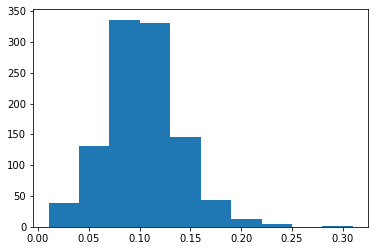

In [90]:
plt.hist(weekday_stock_sent_df_list[0]['pos_ratio'])
plt.show() 

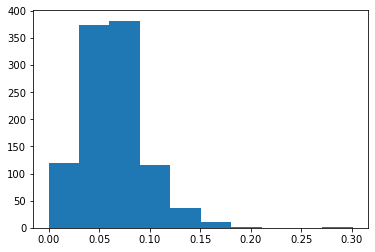

In [91]:
plt.hist(weekday_stock_sent_df_list[0]['neg_ratio'])
plt.show() 

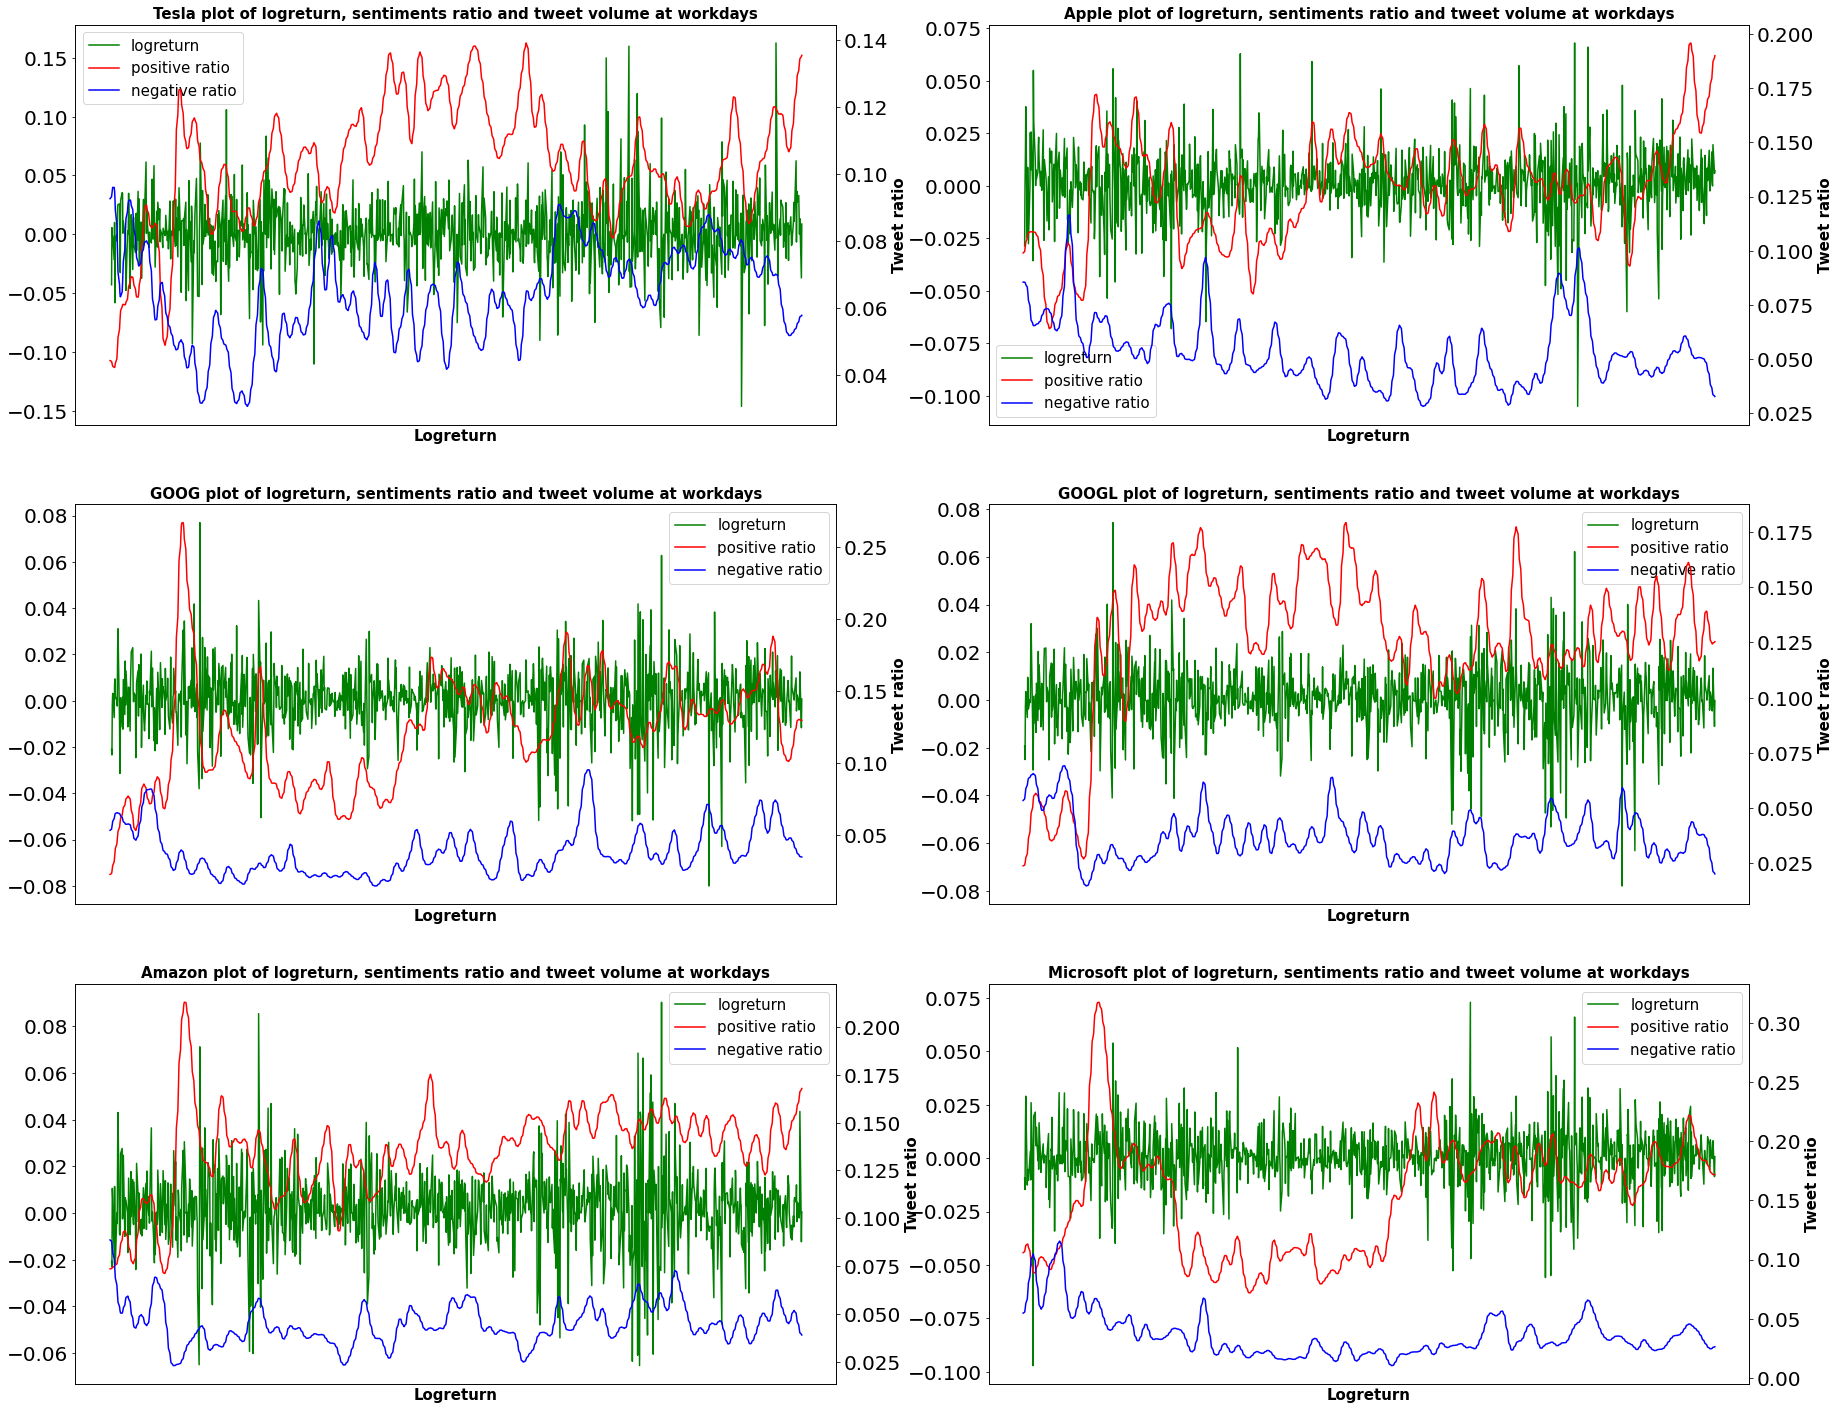

In [46]:
company_name_list = ['Tesla', 'Apple', 'GOOG', 'GOOGL', 'Amazon', 'Microsoft']

fig, axes = plt.subplots(3,2,figsize=(30,25))
axes_list = axes.flatten() #sublots axes

for i,ax in enumerate(axes_list):
    ax.set_title(f'{company_name_list[i]} plot of logreturn, sentiments ratio and tweet volume at workdays',
                 fontdict = {'fontsize':15,'fontweight' : 'bold'})
    c1, = ax.plot(weekday_stock_sent_df_list[i]['date'],weekday_stock_sent_df_list[i]['logreturn'],color='green')

    axes2 = ax.twinx()
    c3, = axes2.plot(weekday_stock_sent_df_list[i]['date'],#weekday_stock_sent_df_list[i]['pos_ratio'],color="red")
                     gaussian_filter1d(weekday_stock_sent_df_list[i]['pos_ratio'], sigma=5),color="red",)
    c4, = axes2.plot(weekday_stock_sent_df_list[i]['date'],#weekday_stock_sent_df_list[i]['neg_ratio'],color="blue")
                     gaussian_filter1d(weekday_stock_sent_df_list[i]['neg_ratio'], sigma=5),color="blue")

    axes2.set_ylabel('Tweet ratio',fontsize=15, fontweight='bold')

    ax.legend([c1, c3, c4],['logreturn', 'positive ratio', 'negative ratio'],fontsize=15)
    ax.set_xlabel('Logreturn',fontsize=15, fontweight='bold')
    ax.set_xticks([])
    
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    axes2.xaxis.set_tick_params(labelsize=20)
    axes2.yaxis.set_tick_params(labelsize=20)

In [49]:
min_num = len(weekday_stock_sent_df_list[0])
for df in weekday_stock_sent_df_list:
    if len(df) < min_num:
        min_num = len(df)
min_num

1043

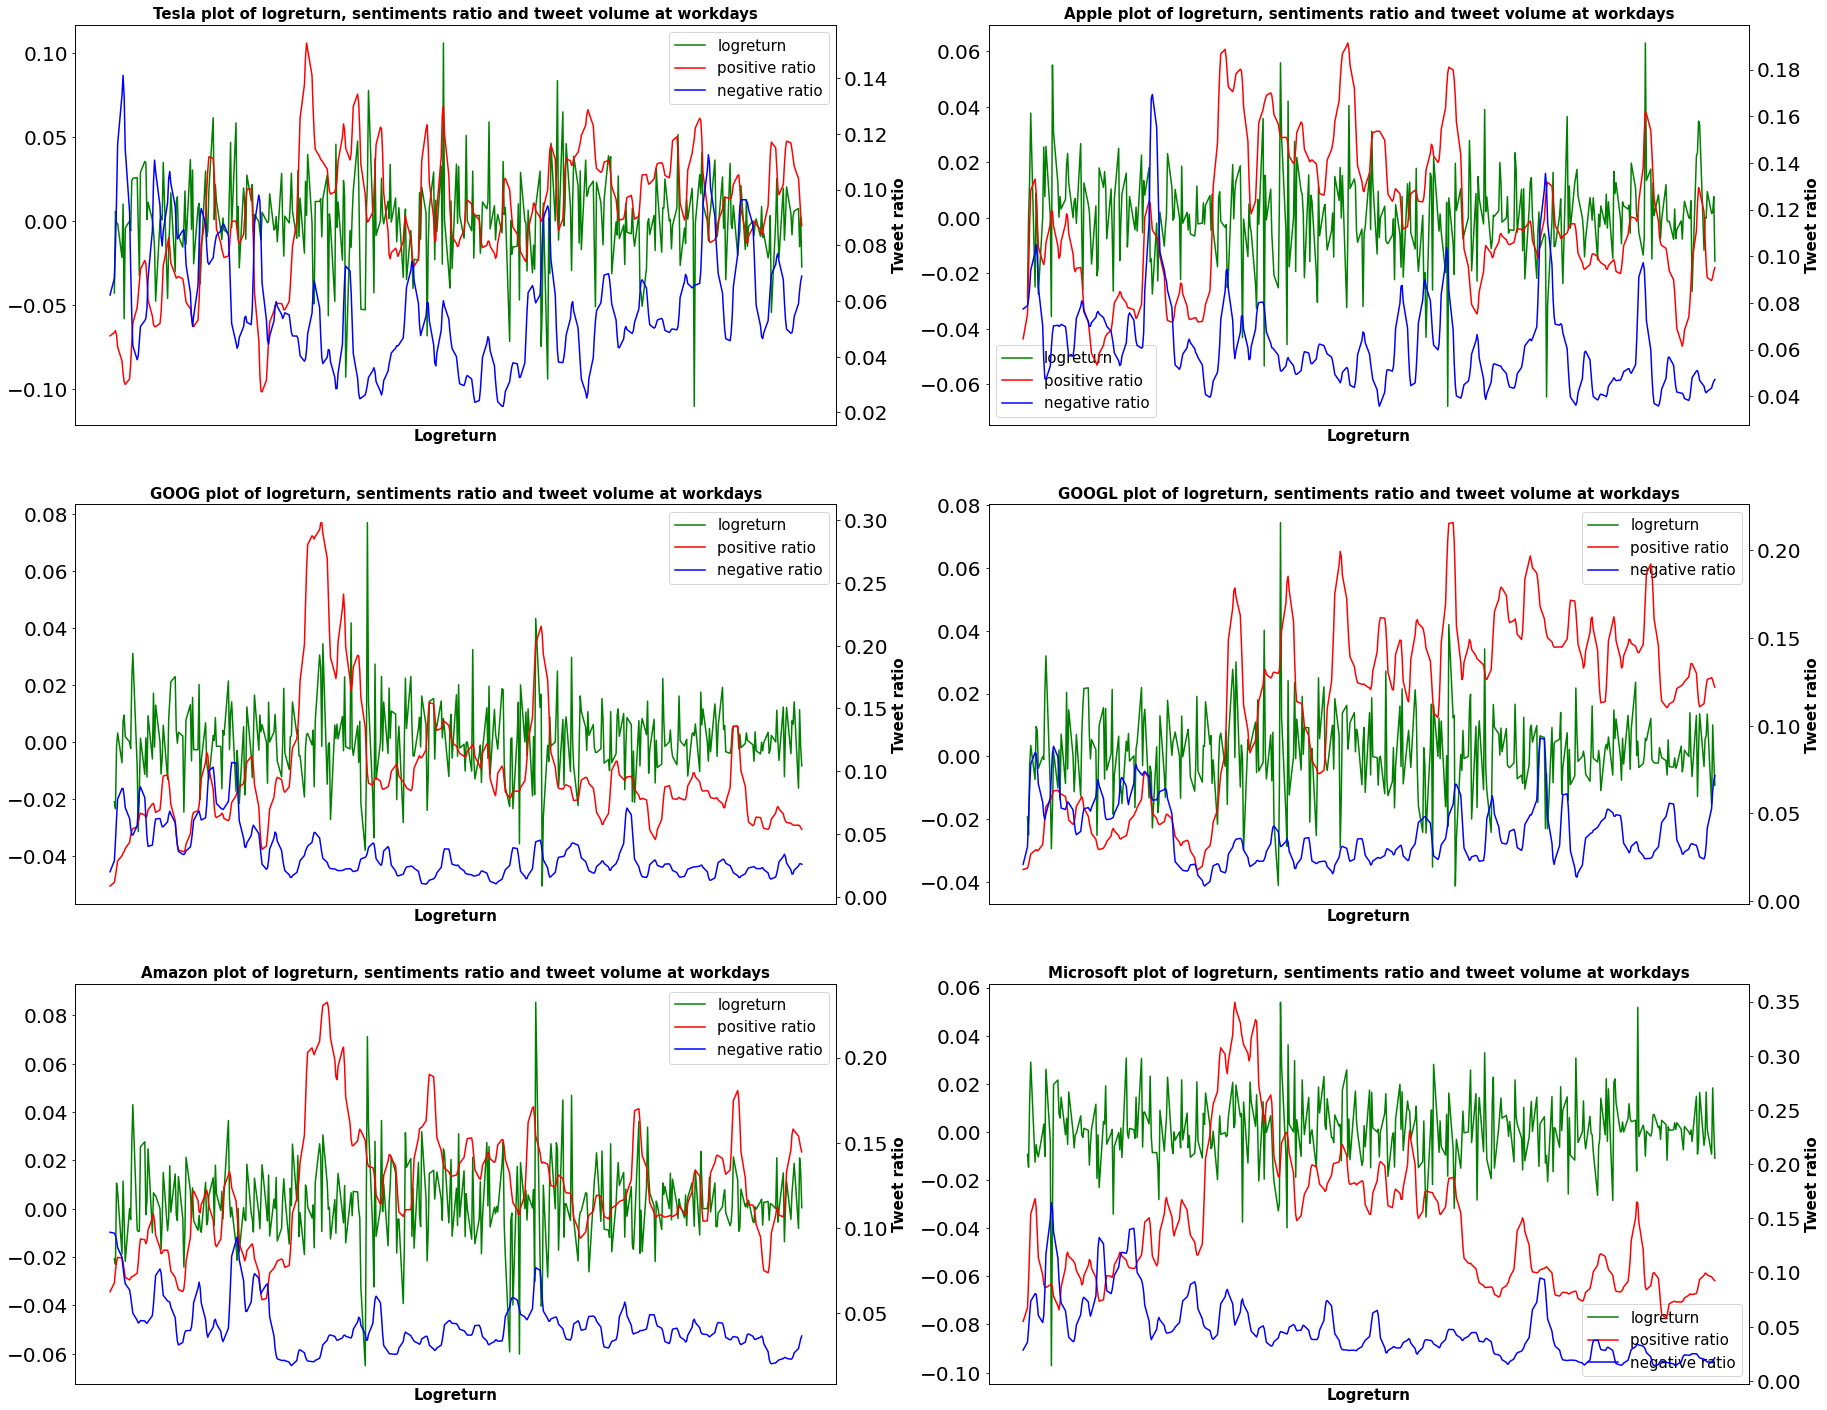

In [89]:
company_name_list = ['Tesla', 'Apple', 'GOOG', 'GOOGL', 'Amazon', 'Microsoft']

fig, axes = plt.subplots(3,2,figsize=(30,25))
axes_list = axes.flatten() #sublots axes
shift_num = 0
#for shift_num in range(0,min_num,30):
    #count += 1
for i,ax in enumerate(axes_list):

    ax.set_title(f'{company_name_list[i]} plot of logreturn, sentiments ratio and tweet volume at workdays',
                 fontdict = {'fontsize':15,'fontweight' : 'bold'})
    c1, = ax.plot(weekday_stock_sent_df_list[i]['date'][shift_num:shift_num+365],
                  weekday_stock_sent_df_list[i]['logreturn'][shift_num:shift_num+365],color='green')

    axes2 = ax.twinx()
    c3, = axes2.plot(weekday_stock_sent_df_list[i]['date'][shift_num:shift_num+365],#weekday_stock_sent_df_list[i]['pos_ratio'][shift_num:shift_num+365],color="red")
                     gaussian_filter1d(weekday_stock_sent_df_list[i]['pos_ratio'][shift_num:shift_num+365], sigma=2),color="red",)
    c4, = axes2.plot(weekday_stock_sent_df_list[i]['date'][shift_num:shift_num+365],#weekday_stock_sent_df_list[i]['neg_ratio'][shift_num:shift_num+365],color="blue")
                     gaussian_filter1d(weekday_stock_sent_df_list[i]['neg_ratio'][shift_num:shift_num+365], sigma=2),color="blue")

    axes2.set_ylabel('Tweet ratio',fontsize=15, fontweight='bold')

    ax.legend([c1, c3, c4],['logreturn', 'positive ratio', 'negative ratio'],fontsize=15)
    ax.set_xlabel('Logreturn',fontsize=15, fontweight='bold')
    ax.set_xticks([])

    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    axes2.xaxis.set_tick_params(labelsize=20)
    axes2.yaxis.set_tick_params(labelsize=20)
        


# 2.) sentiment => stock

In [71]:
weekday_sent_df_list[0].head(10)

,date,pos_ratio,neg_ratio
0,2015-01-01,0.034483,0.034483
1,2015-01-05,0.049383,0.086420
2,2015-01-06,0.062500,0.041667
3,2015-01-07,0.073171,0.121951
4,2015-01-08,0.031008,0.069767
5,2015-01-12,0.027778,0.111111
6,2015-01-13,0.031461,0.301124
7,2015-01-14,0.045455,0.159091
8,2015-01-15,0.015957,0.069149
9,2015-01-19,0.017544,0.052632


In [75]:
datetime.date(2023,2,28)+datetime.timedelta(days=1)

datetime.date(2023, 3, 1)

In [76]:
merge_sent_df_list = []
for weekday_sent_df in weekday_sent_df_list:
    merge_sent_df = weekday_sent_df.copy()
    merge_sent_df['merge_date'] = merge_sent_df['date'] + datetime.timedelta(days=1)
    merge_sent_df_list.append(merge_sent_df)

In [77]:
merge_sent_df_list[0]

,date,pos_ratio,neg_ratio,merge_date
0,2015-01-01,0.034483,0.034483,2015-01-02
1,2015-01-05,0.049383,0.086420,2015-01-06
2,2015-01-06,0.062500,0.041667,2015-01-07
3,2015-01-07,0.073171,0.121951,2015-01-08
4,2015-01-08,0.031008,0.069767,2015-01-09
...,...,...,...,...
1038,2019-12-24,0.122059,0.061765,2019-12-25
1039,2019-12-25,0.114907,0.074534,2019-12-26
1040,2019-12-26,0.139513,0.046816,2019-12-27
1041,2019-12-30,0.125864,0.089903,2019-12-31


In [78]:
weekday_stock_metrics_df_list[0].head(10)

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit,logreturn,open_close_delta
0,TSLA,2015-01-01,222.410,2392947,223.09,225.6800,222.2500,3,NaN,NaN
1,TSLA,2015-01-02,219.310,4753239,222.87,223.2500,213.2600,4,-0.014036,-0.002064
2,TSLA,2015-01-05,210.090,5355485,214.55,216.5000,207.1626,0,-0.042950,0.022186
3,TSLA,2015-01-06,211.280,6257651,210.06,214.2000,204.2100,1,0.005648,0.000143
4,TSLA,2015-01-07,210.950,2965330,213.35,214.7800,209.7800,2,-0.001563,-0.009702
5,TSLA,2015-01-08,210.615,3434901,212.81,213.7999,210.0100,3,-0.001589,-0.008740
6,TSLA,2015-01-09,206.660,4591310,208.92,209.9800,204.9600,4,-0.018957,0.008113
7,TSLA,2015-01-12,202.210,5945607,203.05,204.4700,199.2500,0,-0.021768,0.017779
8,TSLA,2015-01-13,204.250,4247704,203.32,207.6100,200.9110,1,0.010038,-0.005459
9,TSLA,2015-01-14,192.690,11516340,185.83,195.2000,185.0000,2,-0.058262,0.099123


In [79]:
merge_stock_df_list = []
for weekday_stock_metrics_df in weekday_stock_metrics_df_list:
    merge_stock_df = weekday_stock_metrics_df.copy()
    merge_stock_df['merge_date'] = merge_stock_df['date']
    merge_stock_df_list.append(merge_stock_df)

In [80]:
merge_stock_df_list[0]

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit,logreturn,open_close_delta,merge_date
0,TSLA,2015-01-01,222.41,2392947,223.090,225.68,222.2500,3,NaN,NaN,2015-01-01
1,TSLA,2015-01-02,219.31,4753239,222.870,223.25,213.2600,4,-0.014036,-0.002064,2015-01-02
2,TSLA,2015-01-05,210.09,5355485,214.550,216.50,207.1626,0,-0.042950,0.022186,2015-01-05
3,TSLA,2015-01-06,211.28,6257651,210.060,214.20,204.2100,1,0.005648,0.000143,2015-01-06
4,TSLA,2015-01-07,210.95,2965330,213.350,214.78,209.7800,2,-0.001563,-0.009702,2015-01-07
...,...,...,...,...,...,...,...,...,...,...,...
1402,TSLA,2020-05-22,816.88,9987475,822.174,831.78,812.0000,4,-0.013038,0.006600,2020-05-22
1403,TSLA,2020-05-26,818.87,8089736,834.500,834.60,815.7050,1,0.002433,-0.021114,2020-05-26
1404,TSLA,2020-05-27,820.23,11549530,820.860,827.71,785.0000,2,0.001659,-0.002424,2020-05-27
1405,TSLA,2020-05-28,805.81,7275774,813.510,824.75,801.6900,3,-0.017737,0.008261,2020-05-28


In [82]:
merge_stock_sent_df_list = []
for i,merge_sent_df in enumerate(merge_sent_df_list):
    merge_stock_sent_df = pd.merge(merge_stock_df_list[i],merge_sent_df,on='merge_date')
    merge_stock_sent_df_list.append(merge_stock_sent_df)

In [83]:
merge_stock_sent_df_list[0]

,ticker_symbol,date_x,close_value,volume,open_value,high_value,low_value,weekday_digit,logreturn,open_close_delta,merge_date,date_y,pos_ratio,neg_ratio
0,TSLA,2015-01-02,219.310,4753239,222.87,223.2500,213.2600,4,-0.014036,-0.002064,2015-01-02,2015-01-01,0.034483,0.034483
1,TSLA,2015-01-06,211.280,6257651,210.06,214.2000,204.2100,1,0.005648,0.000143,2015-01-06,2015-01-05,0.049383,0.086420
2,TSLA,2015-01-07,210.950,2965330,213.35,214.7800,209.7800,2,-0.001563,-0.009702,2015-01-07,2015-01-06,0.062500,0.041667
3,TSLA,2015-01-08,210.615,3434901,212.81,213.7999,210.0100,3,-0.001589,-0.008740,2015-01-08,2015-01-07,0.073171,0.121951
4,TSLA,2015-01-09,206.660,4591310,208.92,209.9800,204.9600,4,-0.018957,0.008113,2015-01-09,2015-01-08,0.031008,0.069767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,TSLA,2019-12-24,425.250,8054720,418.36,425.4700,412.6875,1,0.014281,0.002056,2019-12-24,2019-12-23,0.117747,0.031570
1038,TSLA,2019-12-25,425.250,8054720,418.36,425.4700,412.6875,2,0.000000,0.016469,2019-12-25,2019-12-24,0.122059,0.061765
1039,TSLA,2019-12-26,430.940,10648290,427.91,433.4800,426.3500,3,0.013292,-0.006216,2019-12-26,2019-12-25,0.114907,0.074534
1040,TSLA,2019-12-27,430.380,9956827,435.00,435.3100,426.1100,4,-0.001300,-0.009333,2019-12-27,2019-12-26,0.139513,0.046816


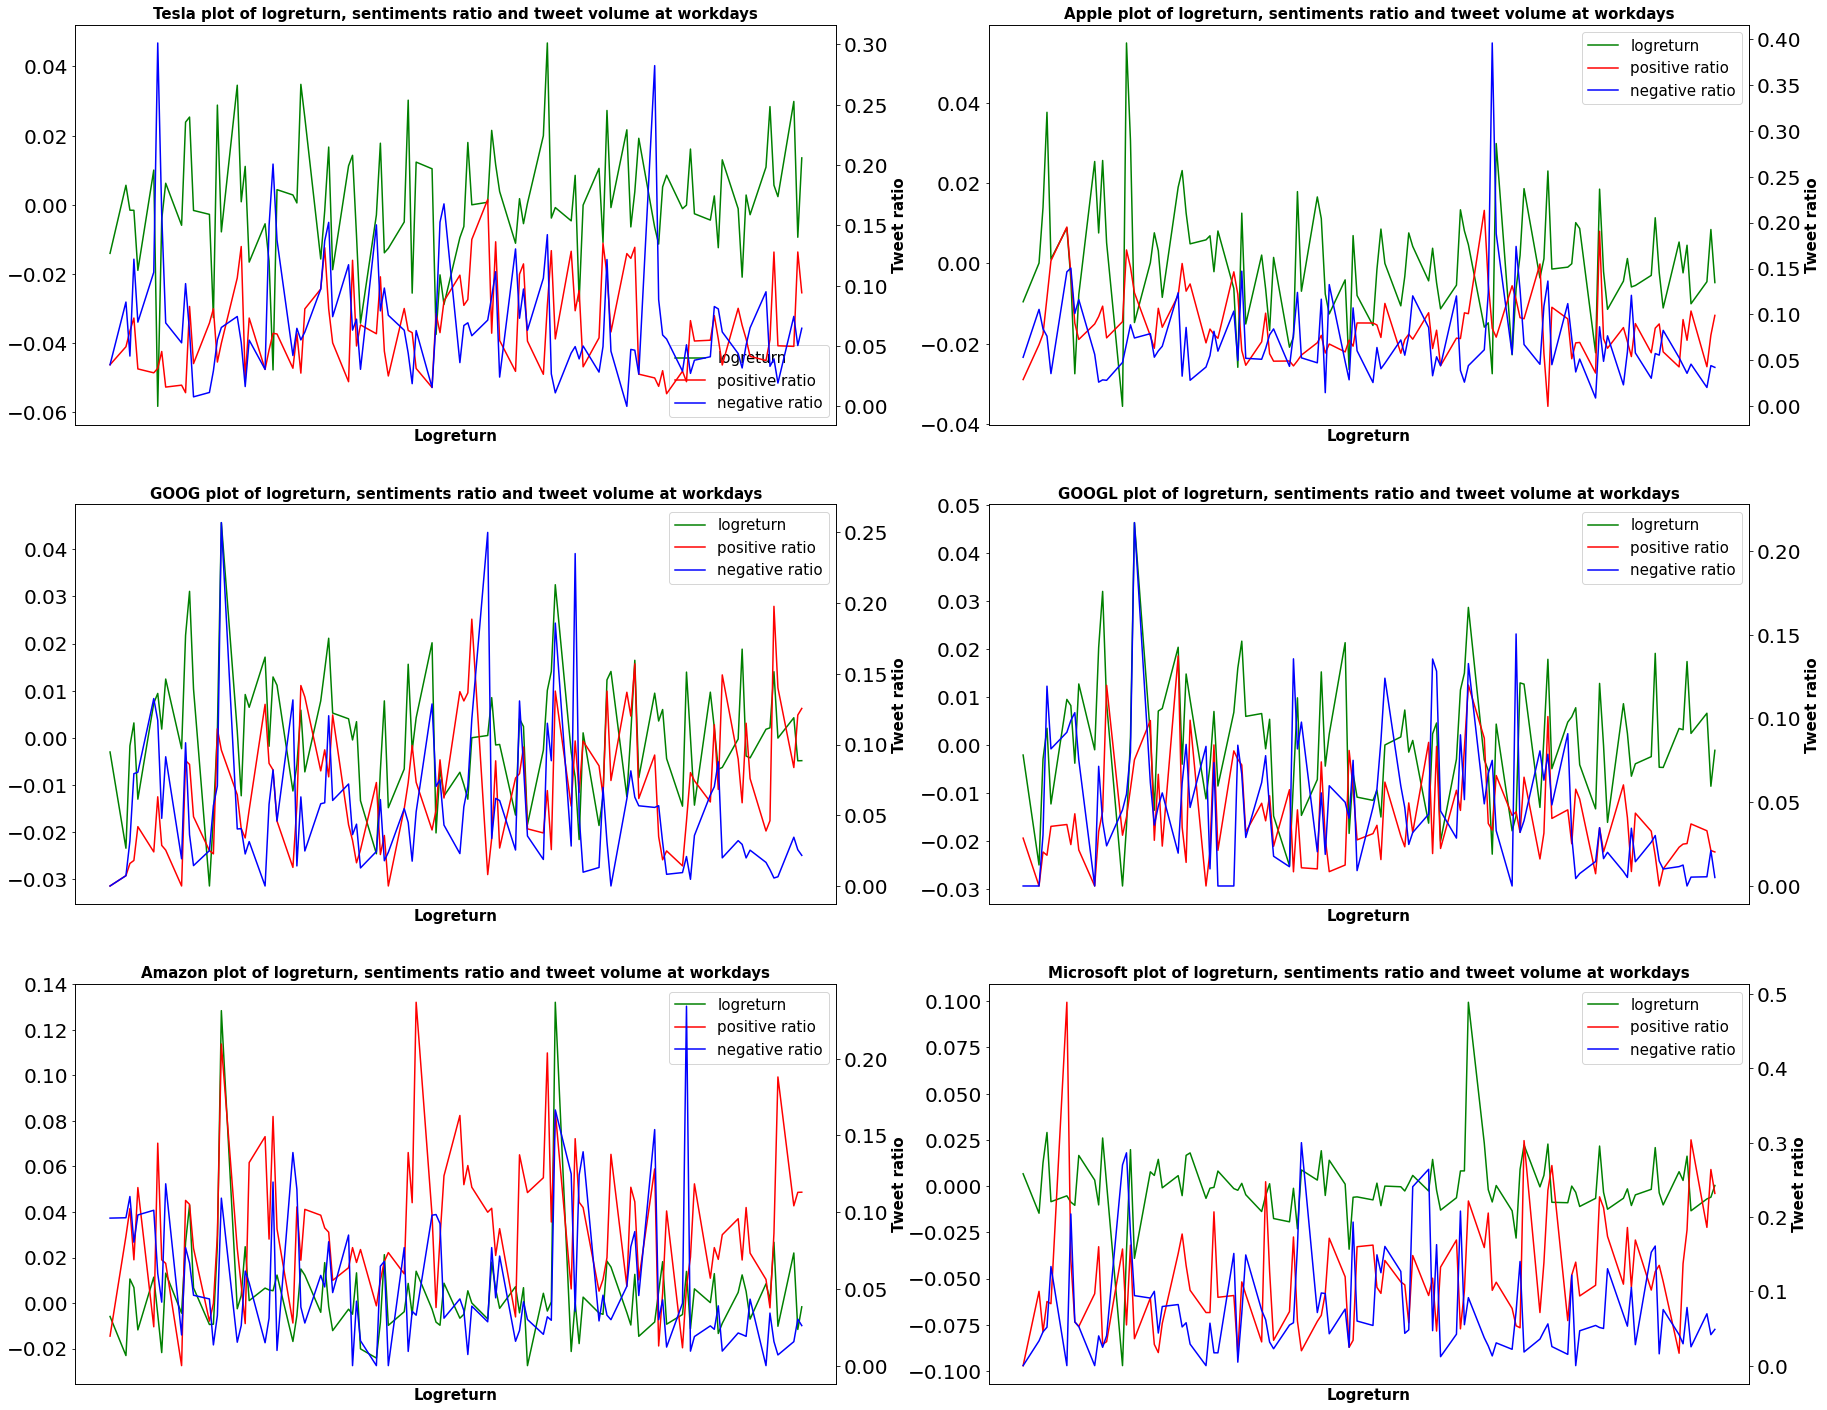

In [86]:
company_name_list = ['Tesla', 'Apple', 'GOOG', 'GOOGL', 'Amazon', 'Microsoft']

fig, axes = plt.subplots(3,2,figsize=(30,25))
axes_list = axes.flatten() #sublots axes
shift_num = 0
#for shift_num in range(0,min_num,30):
    #count += 1
for i,ax in enumerate(axes_list):

    ax.set_title(f'{company_name_list[i]} plot of logreturn, sentiments ratio and tweet volume at workdays',
                 fontdict = {'fontsize':15,'fontweight' : 'bold'})
    c1, = ax.plot(merge_stock_sent_df_list[i]['merge_date'][shift_num:shift_num+100],
                  merge_stock_sent_df_list[i]['logreturn'][shift_num:shift_num+100],color='green')

    axes2 = ax.twinx()
    c3, = axes2.plot(merge_stock_sent_df_list[i]['merge_date'][shift_num:shift_num+100],merge_stock_sent_df_list[i]['pos_ratio'][shift_num:shift_num+100],color="red")
                     #gaussian_filter1d(merge_stock_sent_df_list[i]['pos_ratio'][shift_num:shift_num+365], sigma=5),color="red",)
    c4, = axes2.plot(merge_stock_sent_df_list[i]['merge_date'][shift_num:shift_num+100],merge_stock_sent_df_list[i]['neg_ratio'][shift_num:shift_num+100],color="blue")
                     #gaussian_filter1d(merge_stock_sent_df_list[i]['neg_ratio'][shift_num:shift_num+365], sigma=5),color="blue")

    axes2.set_ylabel('Tweet ratio',fontsize=15, fontweight='bold')

    ax.legend([c1, c3, c4],['logreturn', 'positive ratio', 'negative ratio'],fontsize=15)
    ax.set_xlabel('Logreturn',fontsize=15, fontweight='bold')
    ax.set_xticks([])

    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    axes2.xaxis.set_tick_params(labelsize=20)
    axes2.yaxis.set_tick_params(labelsize=20)

In [ ]:
# 